In [1]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
from scipy.stats import kurtosis, skew
import statsmodels

In [2]:
def delete_multiple_element(list_object, indices):
    indices = sorted(indices, reverse=True)
    for idx in indices:
        if idx < len(list_object):
            list_object.pop(idx)
            
    return list_object

In [3]:
def holm_correction(kruskal):
    line_to_remove=[]
    values=[]
    corrected =[]
    final = []
    for l in kruskal:
        if "nan" in l:
            line_to_remove.append(kruskal.index(l))
    
    new_krusk = delete_multiple_element(kruskal, line_to_remove)
            
    for line in new_krusk:
        ok = line.split('vs.')[1]
        num = ok.split(" ")[2]
        values.append(float(num))
   # values = [x for x in values if isnan(x) == False]
    result = statsmodels.stats.multitest.fdrcorrection(values, alpha=0.05, method='indep', is_sorted=False)
    num = np.where(result[0] == True)
    list_index = ((num)[0]).tolist()

    for i in list_index:
        corrected.append(result[1][i])
    for i in list_index:
        final.append(kruskal[i])
    
    return final, corrected

In [4]:
def kruskal(f, task, c, p, c_name, p_name):
    for i, title in enumerate(task):
        nome = title
        f.write(('\n'+ f'kruskal results for {title} {c_name} {p_name} {stats.kruskal(c[i], p[i]).pvalue} \n\n'))

In [5]:
def read_stats_test(file):
    
    with open(file, 'r') as f:
        lista = []
        testo = f.readlines()
        testo = [line.strip("\n") for line in testo]

        for line in testo:
            if line=="":
                pass
            else:
                lista.append(line)
                
    return lista

In [6]:
def compute_best_scores(lista):    

    values = []
    critical = []
    final = [] 
    
    for l in lista:
        ok = l.split('vs.')[1]
        num = ok.split(" ")[2]
        values.append(num)

    for value in values:
        if float(value) < 0.05:
            critical.append(value)

    for li in lista:
        for cri in critical:
            if cri in li:
                final.append(li)

    return final

In [8]:
word_analysis = []
path = os.listdir("/export/b15/afavaro/Frontiers/Czech_PD/Alignment")

for elem in path:
        word_analysis.append(os.path.join('/export/b15/afavaro/Frontiers/Czech_PD/Alignment/', elem))
        

list_of_dataframes = []
for element in word_analysis:
    participant = pd.read_csv(element)
    elem = os.path.basename(element)
    name = elem.split("_", -1)[-1].split("-")[0]
    task = elem.split("_", 2)[2].split("_")[0]
    label = elem.split("_")[0]
    name = elem.split("_", 3)[1]
    tot= participant.time_stamp.tolist()
    tot = (list(set(tot)))
    unique = participant['time_stamp'].unique()
    stdx = unique.std()
    kurtx = kurtosis(unique)
    skewx =  skew(unique)
     # Compute standard deviation, skewness and kurtosis of the initial timestamp of each word in each recording.

    d = {'names': name, 'label': label, 'task': task,'rhythm_std': stdx,'rhythm_skew': skewx, 'rhythm_kurt': kurtx} # 'Rhythm_kurt': kurtosis, 
    df = pd.DataFrame(d, index =[0])
    list_of_dataframes.append(df)
data = pd.concat(list_of_dataframes, sort=False)
data.dropna()

data = data.dropna()
task_grouped_ = data.groupby("task")
concatenateread = task_grouped_.get_group("readtext")
ESPONTANEA = task_grouped_.get_group("monologue")

## Monologue

In [15]:

grouped = ESPONTANEA.groupby("label") #here we extract the values by category
control = grouped.get_group("CN")
parkinson_ = grouped.get_group("PD")
task = ESPONTANEA.columns[3:].values.tolist()
parkinson_all_feat = np.array([parkinson_[feat] for feat in np.array(ESPONTANEA.columns[3:])])
control_all_feat = np.array([control[feat] for feat in np.array(ESPONTANEA.columns[3:])])

with open('/export/b15/afavaro/Frontiers/submission/CZECH/COGNITIVE/rhythm.txt', 'w') as f:
 
    kruskal(f, task, control_all_feat, parkinson_all_feat, "controls vs.", "parkinson")

kruskal_1 = read_stats_test('/export/b15/afavaro/Frontiers/submission/CZECH/COGNITIVE/rhythm.txt')
holm_correction(kruskal_1)

([], [])

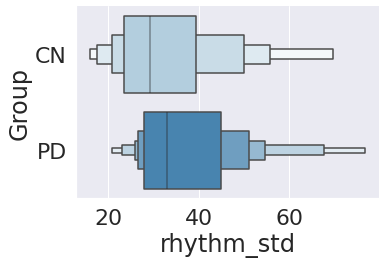

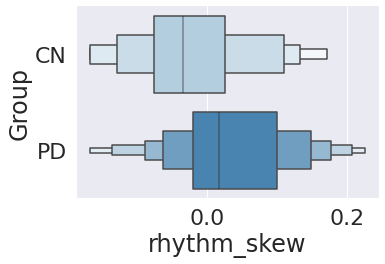

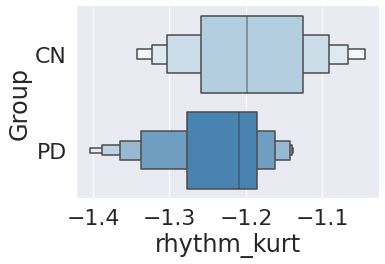

In [16]:
for i, title in enumerate(task):  
    
    nome = title
    controls = []
    parkinson=[]
    data = np.concatenate([control_all_feat[i], parkinson_all_feat[i]])
    data = data.tolist()
    data = [float(x) for x in data if x != "None"]
    [controls.append('CN') for value in range(len(control_all_feat[i]))]
    [parkinson.append('PD') for value in range(len(parkinson_all_feat[i]))]
    lista = controls+parkinson
    dict = {nome: data, 'Group': lista} 
    df = pd.DataFrame(dict)
    sns.set(font_scale=2)
    sns.catplot(x=nome, y="Group", kind="boxen", data=df, k_depth='full', palette="Blues",\
               height=4.2, aspect=1.4, showfliers = False)

    plt.savefig(f'/export/b15/afavaro/Frontiers/submission/CZECH/COGNITIVE/SS_{nome}.png', facecolor='white', dpi=600)
        
    

## Read Passage

In [ ]:
grouped = concatenateread.groupby("label") #here we extract the values by category
control = grouped.get_group("CN") 
parkinson_ = grouped.get_group("PD")
task = concatenateread.columns[3:].values.tolist()
parkinson_all_feat = np.array([parkinson_[feat] for feat in np.array(concatenateread.columns[3:])])
control_all_feat = np.array([control[feat] for feat in np.array(concatenateread.columns[3:])])

with open('/export/b15/afavaro/Frontiers/submission/CZECH/COGNITIVE/read_rhythm.txt', 'w') as f:
 
    kruskal(f, task, control_all_feat, parkinson_all_feat, "controls vs.", "parkinson")

kruskal_1 = read_stats_test('/export/b15/afavaro/Frontiers/submission/CZECH/COGNITIVE/read_rhythm.txt')
holm_correction(kruskal_1)

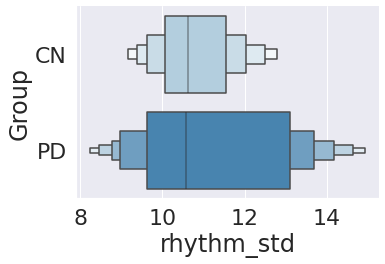

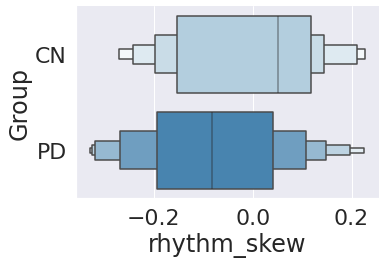

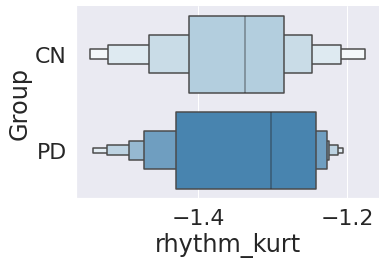

In [18]:
for i, title in enumerate(task):  
    
    nome = title
    controls = []
    parkinson=[]
    data = np.concatenate([control_all_feat[i], parkinson_all_feat[i]])
    data = data.tolist()
    data = [float(x) for x in data if x != "None"]
    [controls.append('CN') for value in range(len(control_all_feat[i]))]
    [parkinson.append('PD') for value in range(len(parkinson_all_feat[i]))]
    lista = controls+parkinson
    dict = {nome: data, 'Group': lista} 
    df = pd.DataFrame(dict)
    sns.set(font_scale=2)
    sns.catplot(x=nome, y="Group", kind="boxen", data=df, k_depth='full', palette="Blues",\
               height=4.2, aspect=1.4, showfliers = False)

    